#Data Analyst Assignment

## Introduction

You are working with a US retail customer on a pilot deployment.  They are using technology to track their merchandise throughout their supply chain.  The flow of their supply is:

*   **DC 1:**  Orders are filled and palletized.
*   **Truck:** Pallets travel from the DC 1 to DC 2 via semi-truck.
*   **DC 2:**  Pallets are unloaded, and additional merchandise may be added.  They are then reloaded onto a new truck.
*   **Truck:** Pallets travel from DC 2 to the Store.
*   **Store:** Pallets are unloaded, cases are removed, and stocked, and the empty cases are left behind the building awaiting pickup.

Your job is to dig into the data and find compelling insights to show the value fo the technology and help move the contract from a pilot into a full scaled deployment.



---

## Part 0: Imports

Import necessary packages and

In [5]:
# YOUR CODE HERE:
# YOUR CODE HERE:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('/content/Assignment_1.xlsx')
data

,asset_type,asset_id,tag_id,Site,Zone,device_id,time_est,lat,lng,Temperature_C,Temperature_F
0,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 11:59:26.628,47.79158,-65.68902,23.0,73.40
1,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,EC5B0499234F,2022-08-02 12:00:22.660,47.79158,-65.68902,23.0,73.40
2,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 12:01:11.234,47.79158,-65.68902,23.0,73.40
3,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,3D8B2BDB8673,2022-08-02 13:47:58.172,47.79158,-65.68902,23.5,74.30
4,tote,2,(01)00850027865010(21)0082T0670,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 11:58:55.049,47.79158,-65.68902,23.0,73.40
...,...,...,...,...,...,...,...,...,...,...,...
130056,tote,205,(01)00850027865010(21)0082T1137,Store,store_front_Store,26AB1C9A2E41,2022-08-04 12:48:51.273,47.74923,-65.64101,23.1,73.58
130057,tote,205,(01)00850027865010(21)0082T1137,Store,store_front_Store,26AB1C9A2E41,2022-08-04 12:49:58.699,47.74923,-65.64101,23.5,74.30
130058,tote,205,(01)00850027865010(21)0082T1137,Store,store_front_Store,26AB1C9A2E41,2022-08-04 12:52:45.173,47.74923,-65.64101,23.0,73.40
130059,tote,205,(01)00850027865010(21)0082T1137,Store,store_front_Store,26AB1C9A2E41,2022-08-04 12:53:48.228,47.74923,-65.64101,23.0,73.40


### Dataset Overview

* Site:  A large space that could contain multiple readers. Ex: DC 1.
* Zone:  Point of interest. These represent areas in which repeaters are installed. These can be thought of as sub-zones.  Ex: Dock Doors.
* Asset ID: The unique ID of the asset.
* Asset Type: The type of thing that is detected (ie tote).
* Device ID: The unique gateway reader ID that detected the device in the zone (there can be multiple in one zone).
* Time est: The time in EST.
* Lon: Longituge
* Lat: Latitude
* Temperature_C / F: Temperature in Celsius, Fahrentheit

## PART 1: Data Overview

### Question 1:

* How many unique cases were we tracking throughout this pilot. (1 pt)
* What are the unique zones we could see (1 pt)
* How many POI's are in each Zone. (2 pts)


In [6]:
# YOUR CODE HERE:
unique_cases = data.asset_id.nunique()
print('We can see a total of', unique_cases, 'unique cases')

We can see a total of 18 unique cases


In [7]:
Zonas = data.Zone.unique()
print('The unique values for Zones that can be identified are as follows:\n\n', Zonas)

The unique values for Zones that can be identified are as follows:

 ['dock_doors_DC1' 'dock_doors_DC2' 'Forklift3_DC1' 'pallet_assembly_DC1'
 'PhoneKit1Bridge' 'PhoneKit2Bridge' 'PhoneKit2GW' 'point_of_sale_Store'
 'receiving_Store' 'staging_DC1' 'staging_DC2' 'store_back_Store'
 'store_front_Store' 'Forklift1_DC1' 'PhoneKit1GW']


### Question 2:

* What is the temperature range we see?  (1pt)
* Where is temperature the highest and lowest (1pt)

In [8]:
# YOUR CODE HERE:
Temp_min = data.Temperature_C.min()
Temp_max = data.Temperature_C.max()

TempF_min = data.Temperature_F.min()
TempF_max = data.Temperature_F.max()

print('Answer 1:')
print('The temperature range in Celcius degrees is:', Temp_min, 'C -', Temp_max, 'C')
print('The temperature range in Fahrenheit degrees is', TempF_min, 'F -', TempF_max, 'F')
print('Answer 2:')

Answer 1:
The temperature range in Celcius degrees is: 19.0 C - 44.0 C
The temperature range in Fahrenheit degrees is 66.2 F - 111.2 F
Answer 2:


## Part 2: The Journey of a Case

### Question 3:

* Create a visualization that shows where a case was at over time at the zone or POI level. Imagine that this would be included in your presentation to the customer. (Non techical audience) (3 pts)

In [9]:
# Filtrar los valores de asset_id igual a 2
data_filtrado = data.loc[data['tag_id'] == '(01)00850027865010(21)0082T0219']

# Realizar el agrupamiento y contar los valores
time = pd.DataFrame(data_filtrado.groupby(['tag_id', 'time_est', 'Zone']).size()).rename(columns={0: 'count'})
time.reset_index(inplace=True)

print(time)


                               tag_id                time_est  \
0     (01)00850027865010(21)0082T0219 2022-08-02 10:59:58.887   
1     (01)00850027865010(21)0082T0219 2022-08-02 11:00:27.633   
2     (01)00850027865010(21)0082T0219 2022-08-02 11:16:33.564   
3     (01)00850027865010(21)0082T0219 2022-08-02 11:17:25.682   
4     (01)00850027865010(21)0082T0219 2022-08-02 11:18:11.883   
...                               ...                     ...   
3343  (01)00850027865010(21)0082T0219 2022-08-05 13:25:27.280   
3344  (01)00850027865010(21)0082T0219 2022-08-05 13:25:55.484   
3345  (01)00850027865010(21)0082T0219 2022-08-05 13:26:23.490   
3346  (01)00850027865010(21)0082T0219 2022-08-05 13:27:15.800   
3347  (01)00850027865010(21)0082T0219 2022-08-05 13:28:24.536   

                     Zone  count  
0     pallet_assembly_DC1      1  
1     pallet_assembly_DC1      1  
2     pallet_assembly_DC1      1  
3     pallet_assembly_DC1      1  
4     pallet_assembly_DC1      1  
...      

### Question 4:

* Visualize how the temperatue changes over time along its journey.  Imagine that this would be included in your presentation to the customer. (Non techical audience) (4 pts)



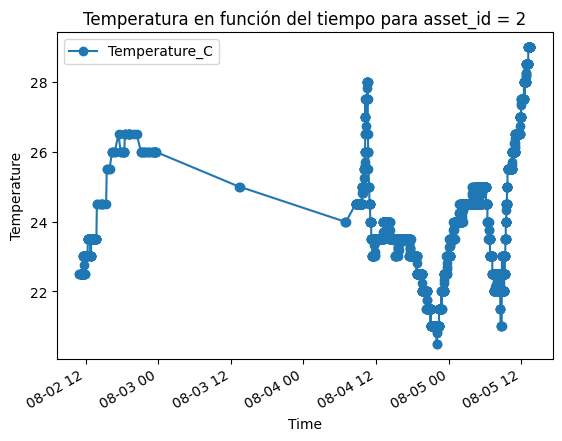

In [10]:
data_filtrado.plot(x='time_est', y='Temperature_C', kind='line', marker='o', linestyle='-')

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperatura en función del tiempo para asset_id = 2')

# Mostrar la gráfica
plt.show()

### Question 5:
* Visualize the lon lat data on a map to show how the case traveled.  You may incorporate any other additional information to make this more impactful. Imagine that this would be included in your presentation to the customer. (Non techical audience) (5 pts)

**Do not worry if this looks like non-sense on a map.  Ex:  The trip may appear to occur over water or in a forest because this is a toy dataset.**

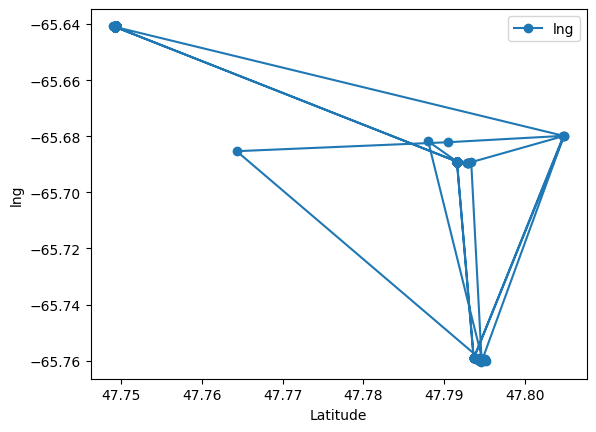

In [11]:
data_filtrado.plot(x = 'lat', y = 'lng', kind='line', marker='o', linestyle='-')
plt.xlabel('Latitude')
plt.ylabel('lng')

plt.show()

# Part 3: Customer Questions


### Question 6:

The customer wants to understand the efficieny of ther DC operations.
* Based on what you see in the data, (all zones except for STORE), which parts of their operation are most & least "efficient? (10 pts)

In [12]:
valores_sin_store = data.loc[~data['Site'].str.contains('Store'), 'Site']

# Mostrar los valores obtenidos
print(valores_sin_store.unique())

['DC 1' 'DC 2' 'Transit']


YOUR TEXT ANSWER HERE

### Question 7:

The customer wants to understand the stocking efficiency in stores.
* Based on what you see in the data, how quickly did the store unload and stock the merchandise. (5 pts)
* How could this be converted in a KPI that a regional manager could track?  (5 pts)

In [13]:
# YOUR CODE HERE

YOUR TEXT ANSWER HERE

### Question 8:

Please explain what you would ask for and what you will do with this data, given that you can talk with the following people (no code needed):


YOUR TEXT ANSWER HERE
* a. X
* b. Y

## Part 4: Bonus Insights

### Question 8

The customer is open to hearing about additional insights you found in the data above and beyond what they asked for.
* Based on what you can see in the data, are there any other interesting insights that the customer may want to hear about? (Up to 15 bonus points)



In [14]:
# YOUR CODE HERE
# Another metrics that could be interesting would be temperature by time

YOUR TEXT ANSWER HERE
